In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_FILE, RESOURCE_DIR

In [2]:
df = pd.read_excel(HISTORICAL_FILE, keep_default_na=False)
#reads projects from Excel file

len(df)
df.head()

,PROJECTS,COMMITS,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,MS Access,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,Etcd,MySQL
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Combining the heuristics of Multimodel DBs (Ignite, MarkLogic and Virtuoso)

In [3]:
df["Join_Ignite-Sql"] = df["Ignite"] +  df["Ignite-Sql"]
df["Join_Ignite-NoSql"] = df["Ignite"] +  df["Ignite-NoSql"]
df["Join_MarkLogic-Sql"] = df["MarkLogic"] +  df["MarkLogic-Sql"]
df["Join_MarkLogic-NoSql"] = df["MarkLogic"] +  df["MarkLogic-NoSql"]
df["Join_Virtuoso-Sql"] = df["Virtuoso"] +  df["Virtuoso-Sql"]
df["Join_Virtuoso-NoSql"] = df["Virtuoso"] +  df["Virtuoso-NoSql"]
df

,PROJECTS,COMMITS,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,maxwell,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3166,maxwell,7,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3167,maxwell,8,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3168,maxwell,9,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Deleting the heuristics of the Bd Multimodels that were alone 

In [4]:
df2 = df
df2.drop(["Ignite", "Ignite-Sql","Ignite-NoSql","MarkLogic","MarkLogic-Sql","MarkLogic-NoSql",
"Virtuoso","Virtuoso-Sql","Virtuoso-NoSql"], axis=1, inplace=True)
df2

,PROJECTS,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,maxwell,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3166,maxwell,7,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3167,maxwell,8,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3168,maxwell,9,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Renaming the Multimodel DB heuristics 

In [5]:
df2['Join_Ignite-Sql']= df2['Join_Ignite-Sql'].replace([2,1],[1,0])
df2['Join_Ignite-NoSql']= df2['Join_Ignite-NoSql'].replace([2,1],[1,0])
df2['Join_MarkLogic-Sql']= df2['Join_MarkLogic-Sql'].replace([2,1],[1,0])
df2['Join_MarkLogic-NoSql']= df2['Join_MarkLogic-NoSql'].replace([2,1],[1,0])
df2['Join_Virtuoso-Sql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2['Join_Virtuoso-NoSql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2

,PROJECTS,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,maxwell,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3166,maxwell,7,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3167,maxwell,8,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3168,maxwell,9,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Generating the file with all the BD heuristics including the Multimodel BD combinations 

In [6]:
HISTORICAL_FILE_JOIN = RESOURCE_DIR + os.sep + 'historical_join.xlsx'
df.to_excel(HISTORICAL_FILE_JOIN, index=False) 
#df2 = df2.to_excel("historical_join.xlsx", index=False)

In [6]:
df

,PROJECTS,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Activiti,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Activiti,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,maxwell,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3166,maxwell,7,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3167,maxwell,8,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3168,maxwell,9,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Number of commits that showed evidence of use by database

In [7]:
#df
df.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                            801
PostgreSQL                       503
H2                               492
Oracle                           409
Ehcache                          357
Redis                            310
MS SQL Server                    221
SQLite                           220
MongoDB                          205
MariaDB                          201
Elasticsearch                    169
IBM DB2                          164
Google Cloud Datastore           132
SAP Adaptive Server              110
HBase                            109
Cassandra                         99
Hazelcast                         88
Hive                              85
DynamoDB                          82
Solr                              78
Firebase Realtime                 65
MS Access                         62
Informix                          61
Memcached                         60
Firebird                          50
SapHana                           44
PostGIS                           41
A

In [8]:
#Teste para encontrar repos com o mesmo nome
#dfnomes = df['PROJECTS'].unique()
#dfnomes = pd.DataFrame(data=dfnomes)
#dfnomes
#dfnomes.to_excel('nomes_historical_join_new.xlsx', index=False)
selecao = df['PROJECTS'].str.startswith('android')
dfteste = df[selecao]
dfteste
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#df_mer= pd.merge(dfnomes, df, on= 'PROJECTS', how='outer', suffixes=['', '_'], indicator=True)
#df_mer
#df_mer.to_excel('compara_nomes_projects.xlsx',index=True)
#duplicados = df.duplicated()
#duplicados.sum()
#dfnomes = pd.DataFrame(data=duplicados)

,PROJECTS,COMMITS,Memcached,Microsoft Azure Table Storage,FileMaker,Riak KV,Hive,Redis,Aerospike,Google Cloud Datastore,...,Teradata,PostGIS,Etcd,MySQL,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
800,android,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,android,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,android,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,android,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804,android,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
805,android,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,android,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,android,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,android,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
809,android,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df2 = df.groupby("PROJECTS").sum()
#df2 = df["COMMITS"].sum().sort_values(ascending=False)
#df2.iloc[: , 1:] => para ocultar a linha COMMITS
df3 = df2.iloc[: , 1:]
df4 = df3.T
df4

PROJECTS,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wire,wiremock,xabber-android,yacy_search_server,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
Memcached,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Microsoft Azure Table Storage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Riak KV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
Redis,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,8,0,0,0
Aerospike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google Cloud Datastore,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,10,0,0,0
MariaDB,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,7,7,0,0
Neo4j,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0


Number of Projects in which there was evidence of use by Database 

In [10]:
def num_missing(x):
   return sum(x >= 1)
#df2.apply(num_missing, axis=0).sort_values(ascending=False)
#without COMMITS
df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False)

MySQL                            107
H2                                74
PostgreSQL                        74
Oracle                            66
Redis                             61
Ehcache                           57
MariaDB                           42
MS SQL Server                     37
SQLite                            36
MongoDB                           36
Elasticsearch                     27
IBM DB2                           24
Google Cloud Datastore            22
Hazelcast                         21
HBase                             19
Cassandra                         18
SAP Adaptive Server               17
DynamoDB                          16
Solr                              15
Firebase Realtime                 14
Hive                              11
Google BigQuery                    9
Informix                           9
Firebird                           8
Memcached                          8
MS Access                          8
PostGIS                            7
C

In [11]:
df4['SumperDatabase'] = df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False)
df4

PROJECTS,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,Apktool,Arduino,AsciidocFX,BIMserver,...,wiremock,xabber-android,yacy_search_server,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile,SumperDatabase
Memcached,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
Microsoft Azure Table Storage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Riak KV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,11
Redis,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,8,0,0,0,61
Aerospike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Google Cloud Datastore,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,10,0,0,0,22
MariaDB,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,7,7,0,0,42
Neo4j,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,4


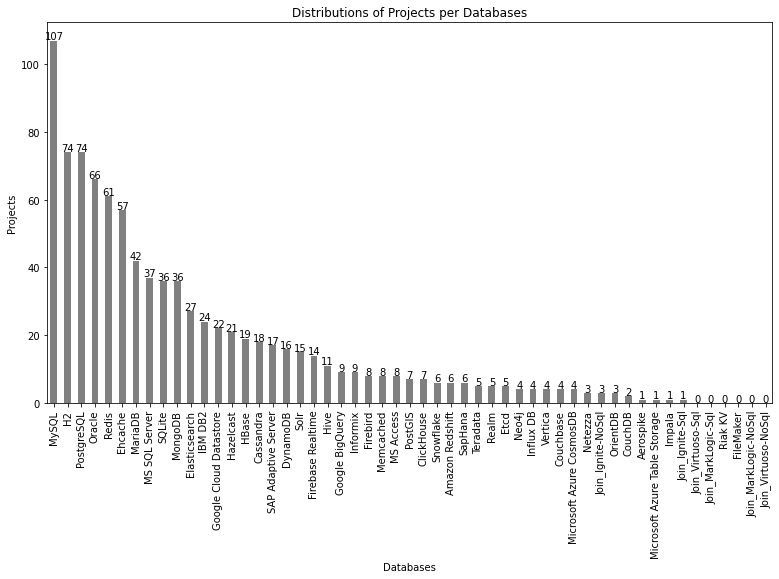

In [12]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects per Databases', color='gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

Number of Projects in which there was indication of use in all versions of the project by Database

In [13]:
def full_commits(x):
   return sum(x == 10)
df2.iloc[: , 1:].apply(full_commits, axis=0).sort_values(ascending=False)

MySQL                            41
PostgreSQL                       22
H2                               20
Oracle                           19
Ehcache                          16
SQLite                            7
IBM DB2                           7
Google Cloud Datastore            6
Redis                             6
MS Access                         4
MS SQL Server                     4
Hive                              4
MongoDB                           4
Hazelcast                         3
Informix                          3
SAP Adaptive Server               3
Teradata                          3
Firebird                          3
Firebase Realtime                 2
Elasticsearch                     2
Netezza                           2
Memcached                         2
SapHana                           2
Snowflake                         1
Solr                              1
Google BigQuery                   1
HBase                             1
MariaDB                     

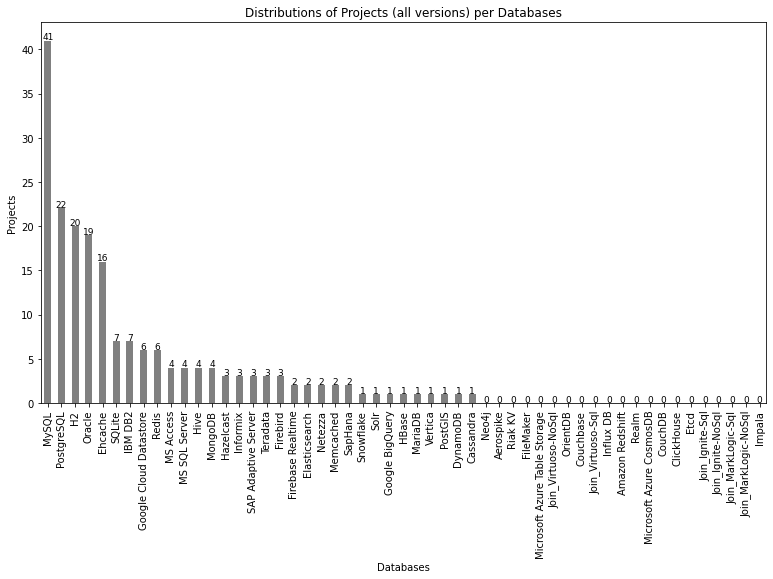

In [14]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 1:].apply(full_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects (all versions) per Databases', color='gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show()
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

Number of Projects in which there was an indication of use in some of the versions of projects by Database

In [15]:
def less_commits(x):
   #return sum(x/10)
   return sum(x % 10 != 0 )
df2.iloc[: , 1:].apply(less_commits, axis=0).sort_values(ascending=False)

MySQL                            66
Redis                            55
H2                               54
PostgreSQL                       52
Oracle                           47
Ehcache                          41
MariaDB                          41
MS SQL Server                    33
MongoDB                          32
SQLite                           29
Elasticsearch                    25
Hazelcast                        18
HBase                            18
IBM DB2                          17
Cassandra                        17
Google Cloud Datastore           16
DynamoDB                         15
SAP Adaptive Server              14
Solr                             14
Firebase Realtime                12
Google BigQuery                   8
ClickHouse                        7
Hive                              7
Informix                          6
Amazon Redshift                   6
PostGIS                           6
Memcached                         6
Firebird                    

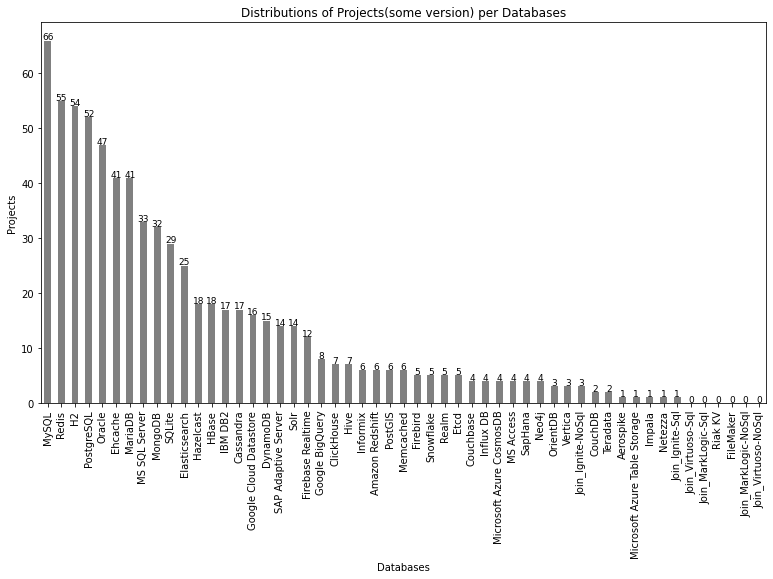

In [16]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 1:].apply(less_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects(some version) per Databases', color = 'gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

In [17]:
df3 = pd.read_excel('historical_join_db3.xlsx', keep_default_na=False)
df3

FileNotFoundError: [Errno 2] No such file or directory: 'historical_join_db6.xlsx'

In [ ]:
df3['Model'].replace({'SQL': 'Relational'}, regex=True, inplace=True)
df3['Model'].replace({'NoRelational': 'NoSQL'}, regex=True, inplace=True)
df3

In [ ]:
colors = {'Relational':'silver','NoSQL':'gray'}
c = df3['Model'].apply(lambda x: colors[x])

plt.figure(figsize=(20,11))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Projects'], color=c ) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Projects'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

plt.xlabel("Databases")
plt.ylabel("Amount of Projects")
plt.title('Distributions of Projects per Databases classify by Models')
ax.legend()
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')
plt.show()

In [ ]:

#from pyexpat import model
#color = dfnames['type'].map(colors)
colors = {'SQL':'blue','NoSQL':'red'}
#gender = df3['Model'].values
model = {'SQL','NoSQL'}
#colors = {'apostel':'blue','lord':'green'}
#vals = ['SQL','NoSQL']
#colors = ["red" if i != 'SQL' else "NoSQL" for i in vals]
plt.figure(figsize=(50,26))
#plot = df3.iloc[: , 1:].apply(num_missing, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects per Databases', color='Model')
plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=df3['Model'].map(colors))
#df3.sort_values('Databases', ascending=False)[['Model']].plot.bar();
#plt.xlabel("Databases")
#plt.ylabel("Projects")
plt.legend(model)
#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

In [ ]:
df4 = pd.read_excel('databases_init_in_out.xlsx', keep_default_na=False)
df4

In [ ]:
br1 = np.arange(df4['Total'])
plt.bar(Data, software_development_results[0], color='#b5ffb9', edgecolor='white', width = barWidth, label ='Software Development')
plt.bar(br1, media_results[0], bottom=software_development_results[0], color='#f9bc86', edgecolor='white', width = barWidth, label ='Media')
plt.bar(br1, infrastructure_management_result[0], bottom=[i+j for i,j in zip(software_development_results[0], media_results[0])], color='#a3acff', edgecolor='white', width = barWidth, label ='Infrastructure Management')
plt.xlabel('Databases', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount of projects', fontweight ='bold', fontsize = 15)
plt.xticks(br1, names_list, rotation=90)
plt.legend()
plt.show()

In [ ]:
#df4=pd.DataFrame(data,columns=["Name","Age","Height(cm)","Weight(kg)"])
plot = df4.plot(x="Databases", y=["Projects","INIT","IN","OUT" ], kind="bar", width=0.8, figsize=(20,11),
     title = 'Comparative distribution of database inputs and outputs')
plt.xlabel('Databases')
plt.ylabel('Amount of projects')
#plt.xticks('Databases', rotation=90)

#plt.show()
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

In [ ]:
#df4=pd.DataFrame(data,columns=["Name","Age","Height(cm)","Weight(kg)"])
plot = df4.plot(x="Databases", y=["Projects","OUT" ], kind="bar", width=0.8, figsize=(20,11), color=['blue','red'],
     title = 'Comparative distribution of database inputs and outputs')
plt.xlabel('Databases')
plt.ylabel('Amount of projects')
#plt.xticks('Databases', rotation=90)

#plt.show()
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

In [ ]:
#df4=pd.DataFrame(data,columns=["Name","Age","Height(cm)","Weight(kg)"])
from util import green


plot = df4.plot(x="Databases", y=["INIT","IN" ], kind="barh", width=0.8, stacked=True, figsize=(20,11), color=['#a3acff','#b5ffb9'],
     title = 'Comparative distribution of database inputs that appear in the first slice and databases inputs that appear in other slices')
     #'Comparative distribution of database inputs first version X inputs in other versions') # color='#f9bc86'
plt.xlabel('Amount of projects')
plt.ylabel('Databases')
#plt.xticks('Databases', rotation=90)

plt.show()
#for i in plot.patches:
 #   plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
  #  ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

In [ ]:

plot = df4.plot(x="Databases", y=["INIT","IN" ], kind="barh", width=0.8, stacked=True, figsize=(20,11), color=['gray','silver'],
     title = 'Comparative distribution of database inputs that appear in the first slice and databases inputs that appear in other slices')
     #'Comparative distribution of database inputs first version X inputs in other versions') # color='#f9bc86'
plt.xlabel('Amount of projects')
plt.ylabel('Databases')
#plt.xticks('Databases', rotation=90)

plt.show()
#for i in plot.patches:
 #   plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
  #  ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

In [ ]:
colors = {'INIT':'blue','IN':'green',}
c = df3['Model'].apply(lambda x: colors[x])

plt.figure(figsize=(20,11))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Projects'], color=c ) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Projects'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

plt.xlabel("Databases")
plt.ylabel("Amount of Projects")
plt.title('Distributions of Projects per Databases classify by Models')
ax.legend()
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')
plt.show()

In [ ]:
#colors = 
colors = ['#1b9e77', '#a9f971']
df3.plot.bar(x = 'Databases', y='Projects', color=colors)
#df3 = df3.groupby('Model')['Databases'].sum()